
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,AA,Alcoa,US Stocks:Materials,-45.46,-44.71,16.75,-15.67,19.94,42.08,31.41,58.30,-15.67,-913.56
1,AAL,American Airlines Group,US Stocks:Industrials,-38.52,124.68,16.45,1.38,-8.79,44.80,33.17,41.07,1.38,0.03
2,AAON,AAON,US Stocks:Industrials,-28.29,-8.95,58.33,40.72,27.28,62.85,51.56,39.00,40.72,1.04
3,ACHC,Acadia Healthcare,US Stocks:Healthcare,553.02,-41.59,-46.51,-5.02,6.78,41.66,16.25,37.54,-5.02,-188.45
4,ACM,AECOM,US Stocks:Industrials,-14.15,-9.81,18.67,16.79,17.13,19.88,11.08,22.50,16.79,0.75
5,ADC,Agree Realty,US Stocks:Real Estate,70.44,-1.65,26.79,9.35,3.37,23.38,11.99,18.28,9.35,0.51
6,AFG,American Financial Group,US Stocks:Financials,12.65,45.71,20.48,11.04,15.64,20.93,10.99,22.18,11.04,0.50
7,AGCO,AGCO,US Stocks:Industrials,296.74,19.34,-13.04,0.71,12.03,32.26,12.09,34.89,0.71,0.02
8,AIT,Applied Industrial Technologies,US Stocks:Industrials,179.85,49.71,43.82,40.43,33.42,25.65,13.60,26.25,40.43,1.54
9,ALE,ALLETE,US Stocks:Utilities,20.01,14.76,15.24,6.19,-0.47,4.48,2.41,21.46,6.19,0.29


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
244,NJR,New Jersey Resources,US Stocks:Utilities,43.44,21.15,19.59,10.92,5.94,21.77,13.57,21.09,10.92,0.52
141,FLEX,Flex Ltd.,US Stocks:Technology,146.77,108.28,73.33,51.93,33.41,54.85,42.39,32.06,51.93,1.62
260,OHI,Omega Healthcare Investors,US Stocks:Real Estate,-13.48,-34.52,36.81,16.99,5.36,27.77,18.42,25.10,16.99,0.68
201,KNF,Knife River Corporation,US Stocks:Materials,15.41,33.23,54.39,54.39,54.39,40.86,25.78,27.74,54.39,1.96
140,FIX,Comfort Systems USA,US Stocks:Industrials,22.97,48.20,97.25,72.39,55.82,102.18,88.41,38.86,72.39,1.86
240,NBIX,Neurocrine Biosciences,US Stocks:Healthcare,241.21,191.50,6.87,26.21,8.37,17.84,9.26,23.04,26.21,1.14
362,UNM,Unum,US Stocks:Financials,78.85,139.59,63.78,47.74,28.07,12.57,6.36,28.52,47.74,1.67
111,DTM,DT Midstream,US Stocks:Energy,12.27,69.04,93.89,32.97,32.97,51.73,43.45,24.07,32.97,1.37
319,SFM,Sprouts Farmers Market,US Stocks:Consumer Staples,1271.34,206.29,209.98,78.87,57.50,29.95,7.38,33.38,78.87,2.36
239,MUSA,Murphy USA,US Stocks:Consumer Discretionary,6.72,23.84,41.77,39.91,35.26,20.41,9.96,26.72,39.91,1.49


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NJR,FLEX,OHI,KNF,FIX,NBIX,UNM,DTM,SFM,MUSA,TKO,Ranked Portfolio
Annual Returns,10.92,51.93,16.99,54.39,72.39,26.21,47.74,32.97,78.87,39.91,49.67,44.44
Std Dev,21.09,32.06,25.10,27.74,38.86,23.04,28.52,24.07,33.38,26.72,30.52,19.69
Sharpe Ratio,0.52,1.62,0.68,1.96,1.86,1.14,1.67,1.37,2.36,1.49,1.63,2.26
Weight,0.09,0.03,0.06,0.05,0.01,0.13,0.19,0.03,0.16,0.12,0.13,1.00
Worst Typical Down Year,-31.26,-12.19,-33.21,-1.09,-5.33,-19.87,-9.30,-15.17,12.11,-13.53,-11.37,5.05
Black Swan,-52.35,-44.25,-58.31,-28.83,-44.19,-42.91,-37.82,-39.24,-21.27,-40.25,-41.89,-14.64


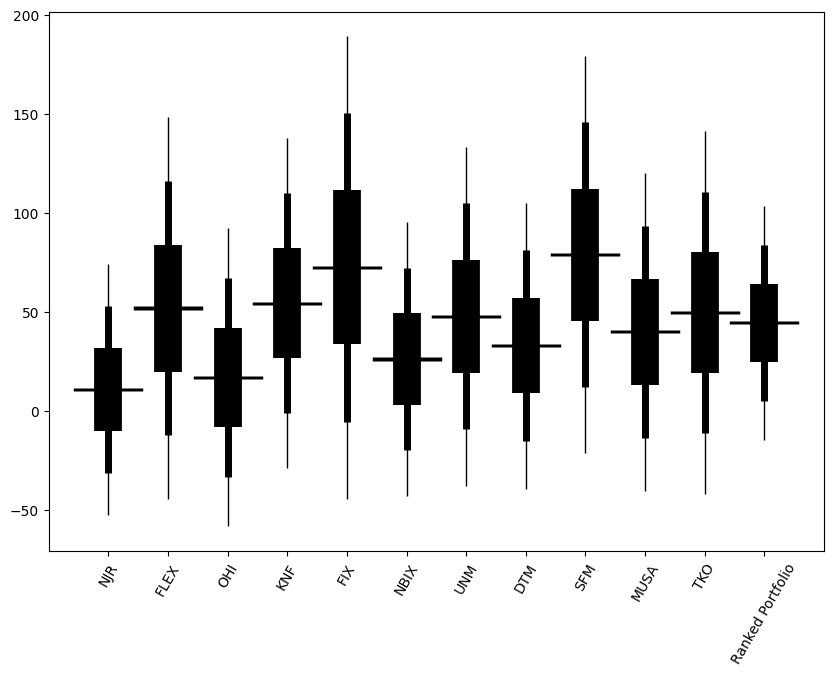

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

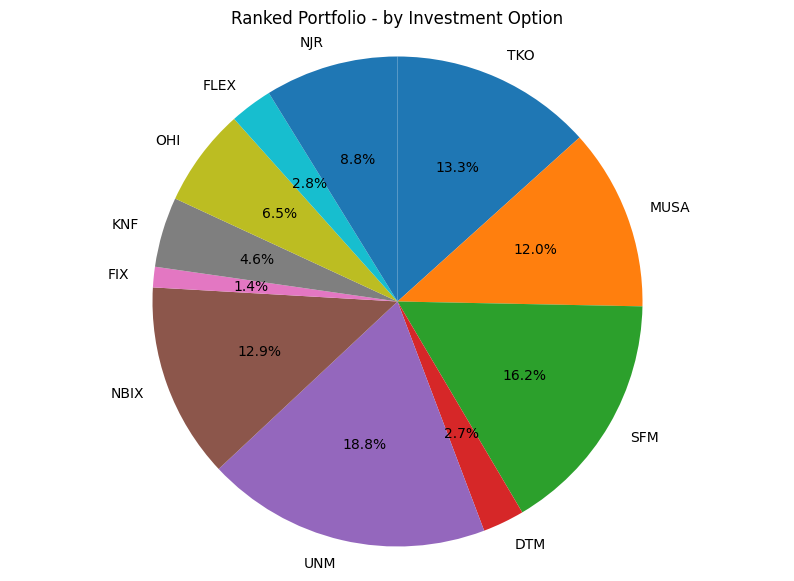

TKO    0.13
MUSA   0.12
SFM    0.16
DTM    0.03
UNM    0.19
NBIX   0.13
FIX    0.01
KNF    0.05
OHI    0.06
FLEX   0.03
NJR    0.09



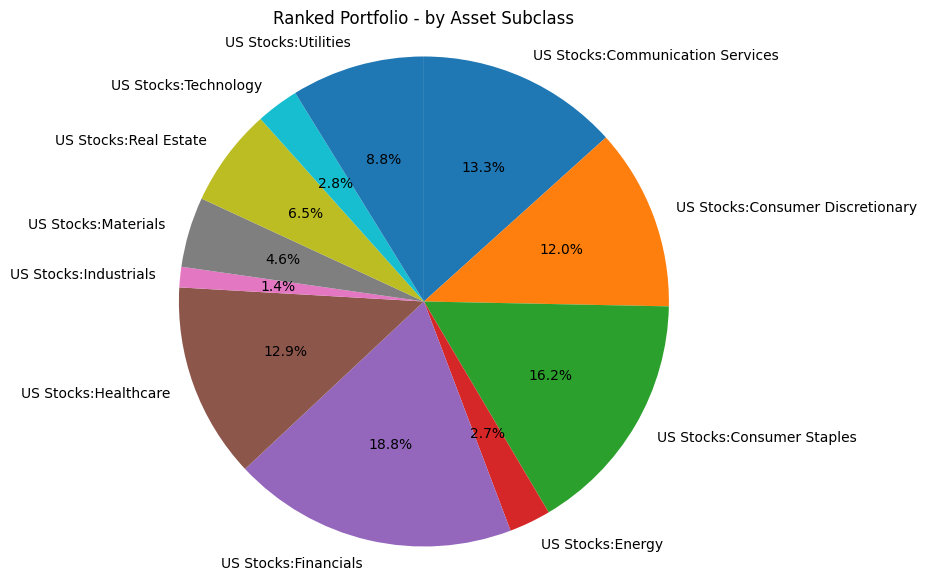

US Stocks:Communication Services   0.13
US Stocks:Consumer Discretionary   0.12
US Stocks:Consumer Staples         0.16
US Stocks:Energy                   0.03
US Stocks:Financials               0.19
US Stocks:Healthcare               0.13
US Stocks:Industrials              0.01
US Stocks:Materials                0.05
US Stocks:Real Estate              0.06
US Stocks:Technology               0.03
US Stocks:Utilities                0.09



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NJR                            0.0880
    FLEX                           0.0282
    OHI                            0.0648
    KNF                            0.0463
    FIX                            0.0135
    NBIX                           0.1290
    UNM                            0.1878
    DTM                            0.0275
    SFM                            0.1618
    MUSA                           0.1199
    TKO                            0.1333


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).